# Most common coroner area to have PFDs

Need to check there are no typos in the area names first: check how many rows of data we have

There are 98 coroners covering approximately (?) 109 coroner areas in this government website: https://www.cps.gov.uk/legal-guidance/coroners???: that is definitely wrong

The judiciary website says there are 88 coroner areas: https://www.judiciary.uk/related-offices-and-bodies/office-chief-coroner/mergers-of-coroner-areas/. 

After checking the html file of this website, there are 86 coroner areas: https://www.coronersociety.org.uk/coroners/


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
names_processed = pd.read_csv('death_info_2022-06-23_processed.csv', converters={'reviews.text' : str})
names_processed.head()

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
0,0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...
1,1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...
2,2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...
3,3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...
4,4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...


In [ ]:
display(names_processed[names_processed['ref']=='2022-0117'])
display(names_processed[names_processed['ref']=='2022-0057'])

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
38,38,25 April 2022,2022-0117,ZZ,John Broadbridge,North Yorkshire and York including North Yorks...,Mental Health related deaths | Suicide (from 2...,"Minister of State for Care and Mental Health, ...",https://www.judiciary.uk/publications/zoe-zare...


,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
98,98,18 February 2022,2022-0057,SMB,John Broadbridge,North Yorkshire and York including North Yorks...,Road (Highways Safety) related deaths |Other r...,North Yorkshire County Council,https://www.judiciary.uk/publications/sasha-ra...


Try Joshua's code in Web_scraper_PFD.ipynb on github

In [ ]:
present_areas = pd.read_csv('areas_2022.csv', header = None)[0]
amalgamations = pd.read_csv("amalgamations.tsv",sep='\t')
amalgamations["Old areas"] = amalgamations["Old areas"].str.split("; ")
amalgamations["New area(s)"] = amalgamations["New area(s)"].str.split("; ")
amalgamations = amalgamations.explode("New area(s)").explode("Old areas")
conversions = dict(zip(amalgamations["Old areas"].dropna(),amalgamations["New area(s)"]))
all_areas = list(np.concatenate(
        (present_areas,
        amalgamations["Old areas"].str.split("; ").explode().dropna().unique())
))
for area in present_areas:
    conversions[area] = area

In [ ]:
replacements = [
    ["kent \(south east \& central\)", "central_south_east_kent"],
    ['leicester city and leicestershire south', 'leicester city and south leicestershire'], 
    ["north.*(east|central|wales).*(east|central|wales).*(east|central|wales)", "north east north central wales"],
    ["\(e\)", "east"],
    ["london \(city\)", "city of london"],
    ['north yorkshire and york including north yorkshire western district', 'north yorkshire (western)'], 
    [".*(hampshire|portsmouth).*", "hampshire_portsmouth_southampton"],
    ["birmingham$", "birmingham_solihull"],
    ["(coroner service|coroner’s court|coroner)", ""],
    [".*knowsley.*", "sefton_knowsley_st_helens"],
    [".*nottingham.*", "nottinghamshire"],
    [".*cumbria.*", "cumbria"],
    [".*derby.*", "derby_derbyshire"],
    [".*(lancashire|blackburn).*", "lancashire_blackburn_darwen"],
    [".*east riding.*", "east_riding_hull"],
    [".*? north tyneside", "north tyneside"],
    [".*leicester.*(south|city).*|.*south.*leicester.*", "leicestershire_south_leicestershire"],
    ["pembrokeshire & camarthenshire", "carmarthenshire_pembrokeshire"],
    ["coventry and warwickshire", "warwickshire"],
    ["-", " "],
    ["\: ", ""],
    ["&", "and"],
    ["the ", " "],
    ["greater ", ""],
    ["([a-z|A-Z])(\(|\))([a-z|A-Z])", "\\1 \\3"],
    ["\(|\)", ""],
    ["(east|west|north|south)ern", "\\1"],
    ["city of ((?!l)[a-z])", "\\1"],
    ["(county of |county )", ""],
    [",", ""],
    [" district", ""],
    [" division", ""],
    [" and", ""],
    [" upon .*? ", " "],
    [".*\; (.*)", "\\1"],
    [" upon ( .*? |.*?$)", ""],
    ["(.*) city", "\\1"],
    ["city and ", ""],
    ["(.*)(inner|innner)(.*)", "inner \\1\\3"],
    ["inner\s+?london (.*)", "inner \\1 london"],
    ["(north|east|west|south) (.*) (north|east|west|south)$", "\\1 \\3 \\2"],
    ["(.*) (north|east|west|south) (north|east|west|south) (north|east|west|south)$", "\\2 \\3 \\4 \\1"],
    ["(.*) (north|east|west|south) (north|east|west|south|central)$", "\\2 \\3 \\1"],
    ["(.*) (north|east|west|south|central)$", "\\2 \\1"],
    [" valley|valleys", ""]
]

def process_area(area):
    area = area.lower()
    for replacement in replacements:
        area = re.sub(replacement[0], replacement[1], area)

    area = area.replace(" ", "_")
    return area

def process_area_test(area):
    area = area.lower()
    for replacement in replacements:
        new = re.sub(replacement[0], replacement[1], area)
        if new != area:
            print(replacement[0], replacement[1], new)            
        area = new
    area = area.replace(" ", "_")
    return area    

all_areas_dict = "\n".join([process_area(area)+" 1" for area in all_areas])

go_back = {process_area(area): conversions[area] for area in all_areas}

with open("areas.txt", "w") as f:
    print(all_areas_dict, file = f)
    
with open("with_unprocessed.txt", "w") as f:
    print("\n".join([area+": "+process_area(area) for area in all_areas]), file = f)

In [ ]:
# North Northumberland
names_processed.loc[names_processed['ref']=='2022-0119', 'coroner_area'] = 'North Northumberland'
names_processed.loc[names_processed['ref']=='2022-0118', 'coroner_area'] = 'South Northumberland'

# North Yorkshire (Western)
names_processed.loc[names_processed['ref']=='2022-0117', 'coroner_area'] = 'North Yorkshire (Western)'
names_processed.loc[names_processed['ref']=='2022-0057', 'coroner_area'] = 'North Yorkshire (Western)'
#Teesside and Hartlepool
names_processed.loc[names_processed['ref']=='2016-0107', 'coroner_area'] = 'Teesside'
names_processed.loc[names_processed['ref']=='2022-0050', 'coroner_area'] = 'Teesside'
names_processed.loc[names_processed['ref']=='2019-0171', 'coroner_area'] = 'Hartlepool'

In [ ]:
by_la = names_processed[names_processed["coroner_area"].notna()].copy()
local_authorities = by_la[by_la["coroner_area"].notna()]["coroner_area"]
to_correct = list(local_authorities.unique())
with open("raw_areas.txt", "w") as f:
    print("\n".join(to_correct), file = f)

In [ ]:
!pip install SymSpellCppPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 4.2 MB/s 
  Created wheel for SymSpellCppPy: filename=SymSpellCppPy-0.0.14-cp37-cp37m-linux_x86_64.whl size=203665 sha256=a28c0dd79318c3bf754aae2fa8a54bf22c4d232f2968ecf000511f18ef382ee3
  Stored in directory: /root/.cache/pip/wheels/4e/94/d7/069d7f3097e722d9c2ce2ac7d85d0262ac3c4fddfc2fb4be42
Successfully built SymSpellCppPy


In [ ]:
import SymSpellCppPy

In [ ]:
symSpell = SymSpellCppPy.SymSpell(max_dictionary_edit_distance=6)
symSpell.load_dictionary(corpus="areas.txt", term_index=0, count_index=1, separator=" ")

True

In [ ]:
class NoMatchError(Exception): pass

def correct_spelling(area):
    original = area
    area = area.lower()
    for replacement in replacements:
        area = re.sub(replacement[0], replacement[1], area)
    area = area.replace(" ", "_")
    attempt = symSpell.lookup(area, SymSpellCppPy.Verbosity.CLOSEST,max_edit_distance=6)
    if not attempt:
        # print("Original" + original)
        raise NoMatchError
    return attempt[0].term
    
def test_correct_spelling(area):
    original = area
    area = area.lower()
    for replacement in replacements:
        new = re.sub(replacement[0], replacement[1], area)
        if new != area:
            print(new, replacement[0], replacement[1])
        area = new
    area = area.replace(" ", "_")
    attempt = symSpell.lookup(area, SymSpellCppPy.Verbosity.CLOSEST,max_edit_distance=6)
    return (original, area, attempt)    

corrections = {}

for area in to_correct:
    try:
        corrections[area] = correct_spelling(area)
    except NoMatchError:
        print(f"Could not match {area}")
        test_correct_spelling(area)
        corrections[area] = area

unsuccessful = [area for area in corrections.keys() if not corrections[area]]

#print(unsuccessful)


after reading Zoe's report, her body was found at Bedale, which is in central North Yorkshire. It is a bit to the west so I guess North Yorkshire (Western)

After reading Sasha's report, she had an accident between Cowling and Glusburn, both of which are in North Yorkshire (Western)

In [ ]:
display(names_processed[names_processed['coroner_area']=="Teesside and Hartlepool"])
display(names_processed[names_processed['coroner_area']=="North Yorkshire and York including North Yorkshire Western District"])

url_1 = names_processed.loc[names_processed['coroner_area']=="North Northumberland and South Northumberland", 'url']
url_2 = names_processed.loc[names_processed['coroner_area']=="North Yorkshire and York including North Yorkshire Western District", 'url']
print(url_2)

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url


,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url


Series([], Name: url, dtype: object)


There are more than one margaret who died and more than one william, so the url got cut, and assumes it is the first Margaret who died (hence Atkinson) (and For William it's Abel)

It caused me to go into a bit of a scare and check that I processed the names_processed csv wrong, but I think I'm safe from that bigger issue

Issue is how do we locate the MG's and WR's url. 

Found MG and WR's urls and read their reports

MG: https://www.judiciary.uk/publications/margaret-greenacre-prevention-of-future-deaths-report/

WR: https://www.judiciary.uk/publications/william-rutherford-prevention-of-future-deaths-report/


The two patients both sustained injuries in Baedling care home (NE22 5TT). Margaret died further north in Wansbeck general hospital. William died further south in Northumbria specialist emergency hospital. 

Guess that one is North Northumberland, one is South northumberland. 

Continue Joshua's code

In [ ]:
by_la["corrected_area"] = by_la["coroner_area"].map(correct_spelling).map(go_back)

In [ ]:
t_h = by_la[by_la['corrected_area'].str.contains('Teesside')]
refs = t_h['ref'].values

I found "Teesside and Hartlepool" to be two coroner areas, but the code merges them into one. I keep Teesside and Hartlepool separate, then also correct individually for three cases

Alternatively, I have also created areas_2022.csv with Teesside and Hartlepool as two coroner areas

In [ ]:
for ref in refs: 
  by_la.loc[by_la['ref']==ref, 'corrected_area']=by_la.loc[by_la['ref']==ref, 'coroner_area']

In [ ]:
by_la.loc[by_la['ref']=='2022-0050', 'corrected_area'] = 'Teesside'
by_la.loc[by_la['ref']=='2019-0171', 'corrected_area'] = 'Hartlepool'

In [ ]:
by_la.loc[by_la['corrected_area']=='Teeside', 'corrected_area'] = 'Teesside'

In [ ]:
area_frequency = pd.DataFrame(by_la["corrected_area"].value_counts())

In [ ]:
area_frequency = area_frequency.reset_index()

In [ ]:
display(area_frequency.head())

,index,corrected_area
0,Manchester South,326
1,Inner North London,208
2,Birmingham and Solihull,126
3,Surrey,118
4,Inner South London,110


In [ ]:
display(area_frequency.shape)

(86, 2)

In [ ]:
area_frequency.sort_values(by = 'corrected_area', ascending = True, inplace = True)

In [ ]:
area_frequency.rename(columns = {'index':'coroner area', 'corrected_area': 'Number of reports'}, inplace = True)

In [ ]:
display(area_frequency[:10])

,coroner area,Number of reports
85,Ceredigion,1
82,"Sefton, Knowsley and St Helens",2
84,Hartlepool,2
83,Herefordshire,2
81,York City,3
79,North Tyneside,4
78,North Yorkshire (Eastern),4
77,South Northumberland,4
80,North Lincolnshire and Grimsby,4
76,Gateshead and South Tyneside,7


Plot horizontal bar chart

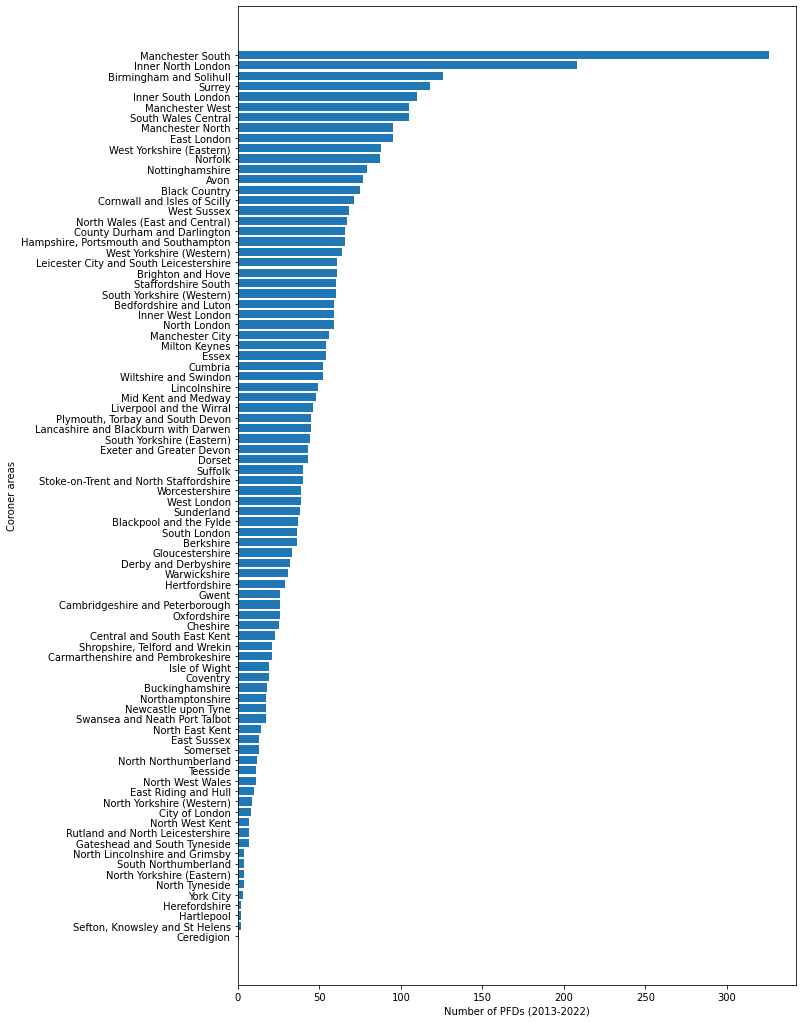

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 18))
plt.barh(area_frequency['coroner area'], area_frequency['Number of reports'])
plt.xlabel('Number of PFDs (2013-2022)')
plt.ylabel('Coroner areas')
plt.yticks(fontsize = 10)
plt.savefig('geographical_variation.png', bbox_inches = "tight")
plt.show()

# Find the median and IQR

In [ ]:
display(area_frequency.describe())

# Save csv

In [ ]:
area_frequency.sort_values(by = 'Number of reports', ascending = False, inplace = True)

In [ ]:
area_frequency.to_csv('geographical_variation_2022-06-22.csv')